In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('Wine.csv')
#Seprating output column
x = df.iloc[:,1:]
y = df.iloc[:,0]

df.head()

Wine  Alcohol  Malic.acid   Ash   Acl   Mg  Phenols  Flavanoids  \
0     1    14.23        1.71  2.43  15.6  127     2.80        3.06   
1     1    13.20        1.78  2.14  11.2  100     2.65        2.76   
2     1    13.16        2.36  2.67  18.6  101     2.80        3.24   
3     1    14.37        1.95  2.50  16.8  113     3.85        3.49   
4     1    13.24        2.59  2.87  21.0  118     2.80        2.69   

   Nonflavanoid.phenols  Proanth  Color.int   Hue    OD  Proline  
0                  0.28     2.29       5.64  1.04  3.92     1065  
1                  0.26     1.28       4.38  1.05  3.40     1050  
2                  0.30     2.81       5.68  1.03  3.17     1185  
3                  0.24     2.18       7.80  0.86  3.45     1480  
4                  0.39     1.82       4.32  1.04  2.93      735

## A. Standardise the Data:

In [7]:
def standardise_data(df):
    for col in df.columns:
        df[col] = (df[col] - df[col].mean())/df[col].std()
    return df

x_std = standardise_data(x)
x_std.head()

Alcohol  Malic.acid       Ash       Acl        Mg   Phenols  Flavanoids  \
0  1.514341   -0.560668  0.231400 -1.166303  1.908522  0.806722    1.031908   
1  0.245597   -0.498009 -0.825667 -2.483841  0.018094  0.567048    0.731565   
2  0.196325    0.021172  1.106214 -0.267982  0.088110  0.806722    1.212114   
3  1.686791   -0.345835  0.486554 -0.806975  0.928300  2.484437    1.462399   
4  0.294868    0.227053  1.835226  0.450674  1.278379  0.806722    0.661485   

   Nonflavanoid.phenols   Proanth  Color.int       Hue        OD   Proline  
0             -0.657708  1.221438   0.251009  0.361158  1.842721  1.010159  
1             -0.818411 -0.543189  -0.292496  0.404908  1.110317  0.962526  
2             -0.497005  2.129959   0.268263  0.317409  0.786369  1.391224  
3             -0.979113  1.029251   1.182732 -0.426341  1.180741  2.328007  
4              0.226158  0.400275  -0.318377  0.361158  0.448336 -0.037767

## B. Compute the Covariance Matrix:

In [10]:
def covariance_calculation(df):
    for col in df.columns:
        df[col] = df[col]-df[col].mean()
       
    return np.dot(df.T,df)/(len(df) - 1)

cov = covariance_calculation(x_std)
print(cov)


[[ 1.          0.09439694  0.2115446  -0.31023514  0.27079823  0.28910112
   0.23681493 -0.15592947  0.13669791  0.5463642  -0.0717472   0.07234319
   0.64372004]
 [ 0.09439694  1.          0.16404547  0.2885004  -0.0545751  -0.335167
  -0.41100659  0.29297713 -0.22074619  0.24898534 -0.56129569 -0.36871043
  -0.19201056]
 [ 0.2115446   0.16404547  1.          0.44336719  0.28658669  0.12897954
   0.11507728  0.18623045  0.00965194  0.25888726 -0.07466689  0.00391123
   0.22362626]
 [-0.31023514  0.2885004   0.44336719  1.         -0.08333309 -0.32111332
  -0.35136986  0.36192172 -0.19732684  0.01873198 -0.27395522 -0.27676855
  -0.44059693]
 [ 0.27079823 -0.0545751   0.28658669 -0.08333309  1.          0.21440123
   0.19578377 -0.25629405  0.23644061  0.19995001  0.0553982   0.06600394
   0.39335085]
 [ 0.28910112 -0.335167    0.12897954 -0.32111332  0.21440123  1.
   0.8645635  -0.4499353   0.61241308 -0.05513642  0.43368134  0.69994936
   0.49811488]
 [ 0.23681493 -0.41100659  0.115

## C. Compute Eigenvectors and Eigenvalues:

(13, 13)


Text(0.5, 0, 'Magnitude of the eigenvalue')

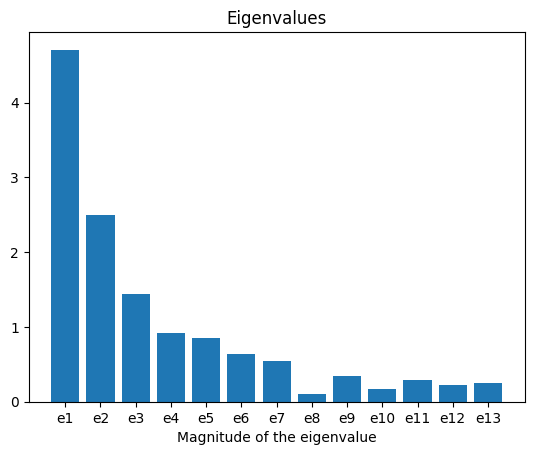

In [11]:
from numpy.linalg import eig
eigenValues, eigenVectors = eig(cov)

print(cov.shape)


plt.bar(["e" + str(i+1) for i in range(len(eigenValues))], eigenValues)
plt.title("Eigenvalues")
plt.xlabel("Magnitude of the eigenvalue")

## D. Sort Eigenvectors by Eigenvalues:

[[-0.1443294   0.48365155 -0.20738262  0.0178563  -0.26566365  0.21353865
   0.05639636  0.39613926 -0.50861912  0.21160473 -0.22591696 -0.26628645
  -0.01496997]
 [ 0.24518758  0.22493093  0.08901289 -0.53689028  0.03521363  0.53681385
  -0.42052391  0.06582674  0.07528304 -0.30907994  0.07648554  0.12169604
  -0.02596375]
 [ 0.00205106  0.31606881  0.6262239   0.21417556 -0.14302547  0.15447466
   0.14917061 -0.17026002  0.30769445 -0.02712539 -0.49869142 -0.04962237
   0.14121803]
 [ 0.23932041 -0.0105905   0.61208035 -0.06085941  0.06610294 -0.10082451
   0.28696914  0.42797018 -0.20044931  0.05279942  0.47931378 -0.05574287
  -0.09168285]
 [-0.14199204  0.299634    0.13075693  0.35179658  0.72704851  0.03814394
  -0.3228833  -0.15636143 -0.27140257  0.06787022  0.07128891  0.06222011
  -0.05677422]
 [-0.39466085  0.06503951  0.14617896 -0.19806835 -0.14931841 -0.0841223
   0.02792498 -0.40593409 -0.28603452 -0.32013135  0.30434119 -0.30388245
   0.46390791]
 [-0.4229343  -0.003359

Text(0.5, 0, 'Magnitude of the eigenvalue')

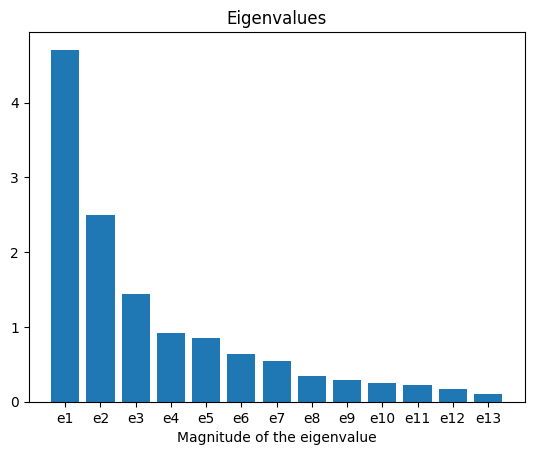

In [13]:
idx = eigenValues.argsort()[::-1]   
eigenValues = eigenValues[idx]
# print(idx)
# print(eigenValues)
eigenVectors = eigenVectors[:,idx]
print(eigenVectors)

plt.bar(["e" + str(i+1) for i in range(len(eigenValues))], eigenValues)
plt.title("Eigenvalues")
plt.xlabel("Magnitude of the eigenvalue")

## E. Choose Principal Components:(Assume 3 principal components)

In [21]:
ev = eigenVectors[:,:3]
ev.shape

(13, 3)

## F. Transform the Data:

In [30]:
new_data = np.dot(x_std.values, ev)
# print(new_data)

# Combine the projected data with the output column y
combined_data = np.concatenate((new_data, y.values.reshape(-1, 1)), axis=1)
print(combined_data)

[[-3.30742097e+00 -1.43940225e+00  1.65272830e-01  1.00000000e+00]
 [-2.20324981e+00  3.32455071e-01  2.02075706e+00  1.00000000e+00]
 [-2.50966069e+00 -1.02825072e+00 -9.80054055e-01  1.00000000e+00]
 [-3.74649719e+00 -2.74861839e+00  1.75696224e-01  1.00000000e+00]
 [-1.00607049e+00 -8.67384035e-01 -2.02098726e+00  1.00000000e+00]
 [-3.04167373e+00 -2.11643092e+00  6.27625371e-01  1.00000000e+00]
 [-2.44220051e+00 -1.17154534e+00  9.74346376e-01  1.00000000e+00]
 [-2.05364379e+00 -1.60443714e+00 -1.45870400e-01  1.00000000e+00]
 [-2.50381135e+00 -9.15488474e-01  1.76598739e+00  1.00000000e+00]
 [-2.74588238e+00 -7.87217029e-01  9.81478855e-01  1.00000000e+00]
 [-3.46994837e+00 -1.29866985e+00  4.21546086e-01  1.00000000e+00]
 [-1.74981688e+00 -6.10255770e-01  1.18752844e+00  1.00000000e+00]
 [-2.10751729e+00 -6.73805614e-01  8.62652985e-01  1.00000000e+00]
 [-3.44842921e+00 -1.12744948e+00  1.20088879e+00  1.00000000e+00]
 [-4.30065228e+00 -2.09007971e+00  1.26035744e+00  1.00000000e